In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cust = pd.read_csv('/Users/mcrob99/codeup-data-science/Resources/Table_CustDetails.csv',error_bad_lines=False)
dates = pd.read_csv('/Users/mcrob99/codeup-data-science/Resources/Table_Dates.csv',error_bad_lines=False)

In [4]:
cust.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,$65.60,$593.30,No,9
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,$59.90,$542.40,No,9
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,$73.90,$280.85,Yes,4
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,$98.00,"$1,237.85",Yes,13
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,$83.90,$267.40,Yes,3


In [5]:
dates.head()

,Date,Support Calls,Support Chats,Support Tickets,original_date,weekday,day,month,year,workdays
0,12/1/2018,21,89,69,20181201,7,1,12,2018,21
1,12/2/2018,15,93,80,20181202,1,2,12,2018,21
2,12/3/2018,62,186,197,20181203,2,3,12,2018,21
3,12/4/2018,78,197,150,20181204,3,4,12,2018,20
4,12/5/2018,89,200,158,20181205,4,5,12,2018,19


In [6]:
cust['is_female'] = cust.gender == 'Female'
cust['has_churned'] = cust.churn == 'Yes'
cust['has_phone'] = cust.phone_service != 0
cust['has_internet'] = cust.internet_service != 0
cust['has_phone_and_internet'] = (cust.has_internet == True) & (cust.has_phone == True)

In [7]:
cust.head(20)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,$65.60,$593.30,No,9,True,False,True,True,True
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,$59.90,$542.40,No,9,False,False,True,True,True
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,$73.90,$280.85,Yes,4,False,True,True,True,True
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,$98.00,"$1,237.85",Yes,13,False,True,True,True,True
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,$83.90,$267.40,Yes,3,True,True,True,True,True
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),$69.40,$571.45,No,8,True,False,True,True,True
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),$109.70,"$7,904.25",No,72,True,False,True,True,True
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),$84.65,"$5,377.80",No,64,False,False,True,True,True
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,$48.20,$340.35,No,7,True,False,True,True,True
9,0016-QLJIS,Female,0,Yes,Yes,2,1,2,Mailed check,$90.45,"$5,957.90",No,66,True,False,True,True,True


In [8]:
conditions = [
    ((cust.partner == 'No') & (cust.dependents == 'No')),
    ((cust.dependents == 'Yes') & (cust.partner == 'Yes')),
    ((cust.dependents == 'Yes') & (cust.partner == 'No')),
    ((cust.dependents == 'No') & (cust.partner == 'Yes'))
]
values = [0,3,2,1]
cust['partner_dependents'] = np.select(conditions, values)

In [9]:
cust[['partner_dependents', 'dependents', 'partner']].head(20)

,partner_dependents,dependents,partner
0,3,Yes,Yes
1,0,No,No
2,0,No,No
3,1,No,Yes
4,1,No,Yes
5,2,Yes,No
6,1,No,Yes
7,1,No,Yes
8,0,No,No
9,3,Yes,Yes


# Project Start
- ```churn``` as a function of one driver
- ```month-to-month (0 Contract type)``` only as it has highest churn

## Cleaning the data

In [11]:
cm = cust.where(cust.contract_type == 0).dropna() #making new df with only month-to-month customers
cm


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,$59.90,$542.40,No,9.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,$73.90,$280.85,Yes,4.0,0.0,1.0,1.0,1.0,1.0,0.0
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,$98.00,"$1,237.85",Yes,13.0,0.0,1.0,1.0,1.0,1.0,1.0
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,$83.90,$267.40,Yes,3.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0013-MHZWF,Female,0.0,No,Yes,1.0,1.0,0.0,Credit card (automatic),$69.40,$571.45,No,8.0,1.0,0.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9975-SKRNR,Male,0.0,No,No,1.0,0.0,0.0,Mailed check,$18.90,18.9,No,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7036,9985-MWVIX,Female,0.0,No,No,1.0,2.0,0.0,Mailed check,$70.15,70.15,Yes,1.0,1.0,1.0,1.0,1.0,1.0,0.0
7037,9986-BONCE,Female,0.0,No,No,1.0,0.0,0.0,Bank transfer (automatic),$20.95,85.5,Yes,4.0,1.0,1.0,1.0,0.0,0.0,0.0
7039,9992-RRAMN,Male,0.0,Yes,No,2.0,2.0,0.0,Electronic check,$85.10,1873.7,Yes,22.0,0.0,1.0,1.0,1.0,1.0,1.0


In [12]:
cm['monthly_charges'] = cm.monthly_charges.apply(lambda x: x.replace('$', '')).astype(float)
cm['total_charges'] = cm.total_charges.apply(lambda x: x.replace('$', '').replace(',', '')).astype(float)

In [13]:
monthly_max = cm.monthly_charges.max()
monthly_min = cm.monthly_charges.min()

In [14]:
more_than_mean_monthly = cm[cm.monthly_charges > cm.monthly_charges.mean()]
less_than_mean_monthly = cm[cm.monthly_charges < cm.monthly_charges.mean()]
less_than_mean_monthly

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.90,542.40,No,9.0,0.0,0.0,1.0,1.0,1.0,0.0
8,0015-UOCOJ,Female,1.0,No,No,1.0,1.0,0.0,Electronic check,48.20,340.35,No,7.0,1.0,0.0,1.0,1.0,1.0,0.0
19,0023-HGHWL,Male,1.0,No,No,0.0,1.0,0.0,Electronic check,25.10,25.10,Yes,1.0,0.0,1.0,0.0,1.0,0.0,0.0
23,0030-FNXPP,Female,0.0,No,No,1.0,0.0,0.0,Mailed check,19.85,57.20,No,3.0,1.0,0.0,1.0,0.0,0.0,0.0
24,0031-PVLZI,Female,0.0,Yes,Yes,1.0,0.0,0.0,Mailed check,20.35,76.35,Yes,4.0,1.0,1.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7026,9970-QBCDA,Female,0.0,No,No,1.0,0.0,0.0,Credit card (automatic),19.70,129.55,No,7.0,1.0,0.0,1.0,0.0,0.0,0.0
7029,9972-NKTFD,Female,0.0,No,No,1.0,1.0,0.0,Bank transfer (automatic),54.65,1517.50,No,28.0,1.0,0.0,1.0,1.0,1.0,0.0
7033,9975-SKRNR,Male,0.0,No,No,1.0,0.0,0.0,Mailed check,18.90,18.90,No,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7037,9986-BONCE,Female,0.0,No,No,1.0,0.0,0.0,Bank transfer (automatic),20.95,85.50,Yes,4.0,1.0,1.0,1.0,0.0,0.0,0.0


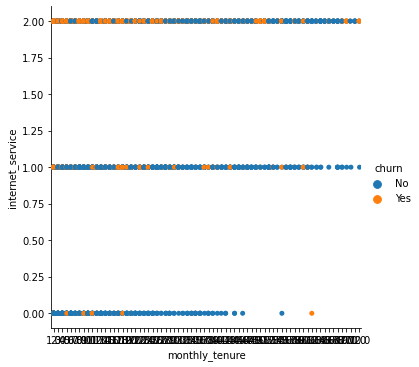

In [15]:
sns.catplot(x='monthly_tenure', y='internet_service', hue = 'churn', data = cm)

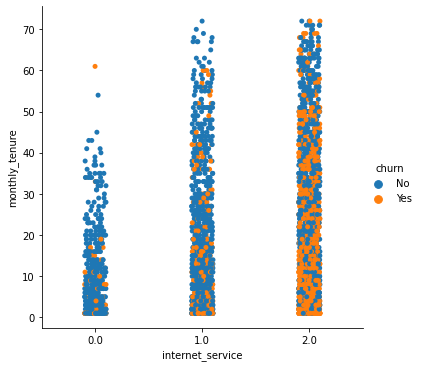

In [276]:
sns.catplot(x='internet_service', y='monthly_tenure', hue = 'churn', data = cm)

In [84]:
cm['has_two_lines'] = cm.phone_service == 2
cm['has_fiber_internet'] = cm.internet_service == 2
cm['has_phone_and_internet'] = (cm.has_two_lines == True) & (cm.has_fiber_internet == True)

In [133]:
#cm.drop(columns = 'has_fiber_internet', inplace = True)
cm

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,partner_dependents,has_phone_and_internet,tenure_less_than_mean
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.90,542.40,No,9.0,0.0,False,True
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.90,280.85,Yes,4.0,0.0,False,True
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.00,1237.85,Yes,13.0,1.0,False,True
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.90,267.40,Yes,3.0,1.0,False,True
5,0013-MHZWF,Female,0.0,No,Yes,1.0,1.0,0.0,Credit card (automatic),69.40,571.45,No,8.0,2.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9975-SKRNR,Male,0.0,No,No,1.0,0.0,0.0,Mailed check,18.90,18.90,No,1.0,0.0,False,True
7036,9985-MWVIX,Female,0.0,No,No,1.0,2.0,0.0,Mailed check,70.15,70.15,Yes,1.0,0.0,False,True
7037,9986-BONCE,Female,0.0,No,No,1.0,0.0,0.0,Bank transfer (automatic),20.95,85.50,Yes,4.0,0.0,False,True
7039,9992-RRAMN,Male,0.0,Yes,No,2.0,2.0,0.0,Electronic check,85.10,1873.70,Yes,22.0,1.0,True,False


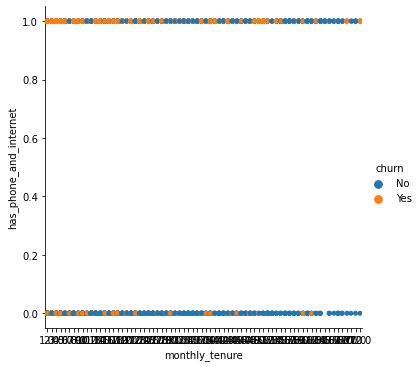

In [161]:
sns.catplot(x='monthly_tenure', y='has_phone_and_internet', hue = 'churn', data = cm)

In [17]:
cm['tenure_less_than_mean'] = cm.monthly_tenure < cm.monthly_tenure.mean()
#cm['tenure_less_than_mean'] = tenure_less_than_mean
cm

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,is_female,has_churned,has_phone,has_internet,has_phone_and_internet,partner_dependents,tenure_less_than_mean
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.90,542.40,No,9.0,0.0,0.0,1.0,1.0,1.0,0.0,True
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.90,280.85,Yes,4.0,0.0,1.0,1.0,1.0,1.0,0.0,True
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.00,1237.85,Yes,13.0,0.0,1.0,1.0,1.0,1.0,1.0,True
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.90,267.40,Yes,3.0,1.0,1.0,1.0,1.0,1.0,1.0,True
5,0013-MHZWF,Female,0.0,No,Yes,1.0,1.0,0.0,Credit card (automatic),69.40,571.45,No,8.0,1.0,0.0,1.0,1.0,1.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9975-SKRNR,Male,0.0,No,No,1.0,0.0,0.0,Mailed check,18.90,18.90,No,1.0,0.0,0.0,1.0,0.0,0.0,0.0,True
7036,9985-MWVIX,Female,0.0,No,No,1.0,2.0,0.0,Mailed check,70.15,70.15,Yes,1.0,1.0,1.0,1.0,1.0,1.0,0.0,True
7037,9986-BONCE,Female,0.0,No,No,1.0,0.0,0.0,Bank transfer (automatic),20.95,85.50,Yes,4.0,1.0,1.0,1.0,0.0,0.0,0.0,True
7039,9992-RRAMN,Male,0.0,Yes,No,2.0,2.0,0.0,Electronic check,85.10,1873.70,Yes,22.0,0.0,1.0,1.0,1.0,1.0,1.0,False


In [18]:
cmtlm = cm.where(cm.tenure_less_than_mean == True).dropna()

   ## Hypothesis
```monthly_tenure```, ```internet_service```, and ```phone_service``` affect the ```churn``` rate.

In [20]:
conditions = [
    ((cmtlm.phone_service != 2) & (cmtlm.internet_service != 2)),
    ((cmtlm.phone_service == 2) & (cmtlm.internet_service != 2)),
    ((cmtlm.phone_service != 2) & (cmtlm.internet_service == 2)),
    ((cmtlm.phone_service == 2) & (cmtlm.internet_service == 2)),
]
values = [0.0,1.0,2.0,3.0]
cmtlm['fiber_two_lines'] = np.select(conditions, values)

- 0 = neither fiber nor two lines
- 1 = two lines no fiber
- 2 = fiber but not two lines
- 3 = fiber and two lines

cmtlm.monthly_tenure.max()

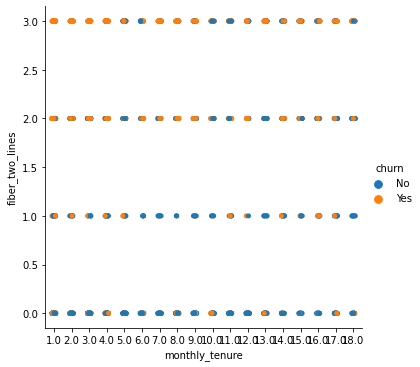

In [189]:
sns.catplot(x='monthly_tenure', y= 'fiber_two_lines', hue = 'churn', data = cmtlm)

In [21]:
cmtlm.fiber_two_lines

1       1.0
2       2.0
3       2.0
4       2.0
5       0.0
       ... 
7026    0.0
7033    0.0
7036    2.0
7037    0.0
7040    0.0
Name: fiber_two_lines, Length: 2416, dtype: float64

/Users/mcrob99/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


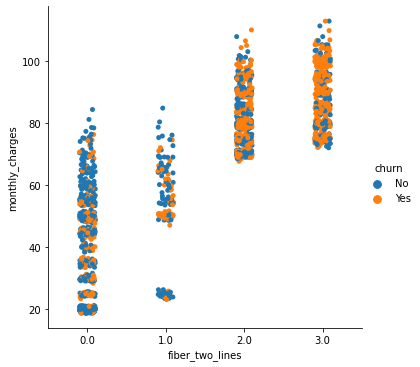

In [277]:
sns.catplot('fiber_two_lines', 'monthly_charges', hue = 'churn', data=cmtlm)

In [272]:
cm

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,monthly_tenure,partner_dependents,is_female,has_churned,has_phone,has_internet,has_phone_and_internet
1,0003-MKNFE,Male,0.0,No,No,2.0,1.0,0.0,Mailed check,59.90,542.40,No,9.0,0.0,0.0,0.0,1.0,1.0,1.0
2,0004-TLHLJ,Male,0.0,No,No,1.0,2.0,0.0,Electronic check,73.90,280.85,Yes,4.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0011-IGKFF,Male,1.0,Yes,No,1.0,2.0,0.0,Electronic check,98.00,1237.85,Yes,13.0,1.0,0.0,1.0,1.0,1.0,1.0
4,0013-EXCHZ,Female,1.0,Yes,No,1.0,2.0,0.0,Mailed check,83.90,267.40,Yes,3.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0013-MHZWF,Female,0.0,No,Yes,1.0,1.0,0.0,Credit card (automatic),69.40,571.45,No,8.0,2.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9975-SKRNR,Male,0.0,No,No,1.0,0.0,0.0,Mailed check,18.90,18.90,No,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7036,9985-MWVIX,Female,0.0,No,No,1.0,2.0,0.0,Mailed check,70.15,70.15,Yes,1.0,0.0,1.0,1.0,1.0,1.0,1.0
7037,9986-BONCE,Female,0.0,No,No,1.0,0.0,0.0,Bank transfer (automatic),20.95,85.50,Yes,4.0,0.0,1.0,1.0,1.0,0.0,0.0
7039,9992-RRAMN,Male,0.0,Yes,No,2.0,2.0,0.0,Electronic check,85.10,1873.70,Yes,22.0,1.0,0.0,1.0,1.0,1.0,1.0


In [ ]:
sns.lineplot(x= '')

In [30]:
fib_two = cm.customer_id.where(cm.internet_service == 2).dropna().count()
fib_two

2128

In [279]:
mon_to_mon = cm.contract_type.count()
mon_to_mon

3875

In [280]:
(fib_two / mon_to_mon) * 100

54.91612903225806

In [283]:
fib_twoltm = cmtlm.customer_id.where(cmtlm.internet_service == 2).dropna().count()
fib_twoltm

1156

In [284]:
mon_to_monltm = cmtlm.contract_type.count()
mon_to_monltm

2416

In [285]:
(fib_twoltm / mon_to_monltm) * 100

47.847682119205295

In [290]:
cm.monthly_charges.mean()

66.39849032258064

In [291]:
cm.monthly_charges.where(cm.internet_service == 2).dropna().mean()

87.02119360902266

In [296]:
cmtlm.monthly_charges.mean() / (cmtlm.monthly_charges.where(cmtlm.internet_service == 2).dropna().mean())

0.72240752031047

In [35]:
cmtlm['expected'] = cmtlm.monthly_charges.where((cmtlm.fiber_two_lines == 2) | (cmtlm.fiber_two_lines == 3)).apply(lambda x: x*.80)

## Reccommendation calcs.

In [312]:
before_max = cmtlm.monthly_charges.max()
before_max

112.95

In [313]:
after_max = cmtlm.expected.max()
after_max

90.36000000000001

In [316]:
before_mean = cmtlm.monthly_charges.mean()
before_mean

59.973509933774885

In [317]:
after_mean = cmtlm.expected.mean()
after_mean

47.97880794701992

In [321]:
churn_rate = (cmtlm.churn.where(cmtlm.churn == 'Yes').count()) / cmtlm.churn.count()
churn_rate

0.4962748344370861

In [323]:
cm.monthly_tenure.mean()

18.02116129032258

In [330]:
rec = pd.DataFrame(cmtlm, columns=['churn', 'expected', 'monthly_charges', 'monthly_tenure', 'fiber_two_lines'])

In [331]:
rec

,churn,expected,monthly_charges,monthly_tenure,fiber_two_lines
1,No,47.92,59.90,9.0,1.0
2,Yes,59.12,73.90,4.0,2.0
3,Yes,78.40,98.00,13.0,2.0
4,Yes,67.12,83.90,3.0,2.0
5,No,55.52,69.40,8.0,0.0
...,...,...,...,...,...
7026,No,15.76,19.70,7.0,0.0
7033,No,15.12,18.90,1.0,0.0
7036,Yes,56.12,70.15,1.0,2.0
7037,Yes,16.76,20.95,4.0,0.0


/Users/mcrob99/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


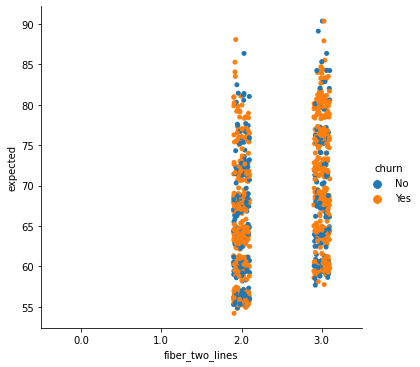

In [40]:
sns.catplot('fiber_two_lines', cmtlm['expected'],hue = 'churn', data=cmtlm)

/Users/mcrob99/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


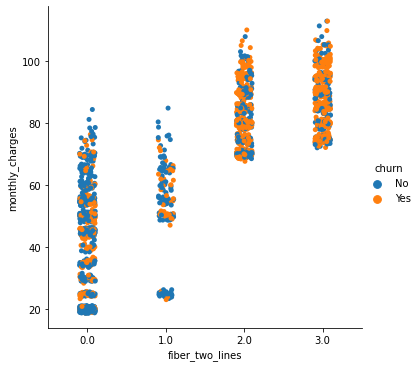

In [28]:
sns.catplot('fiber_two_lines', 'monthly_charges', hue = 'churn', data=cmtlm)